In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',None)

In [ ]:
train_df=pd.read_csv("D:\\machine learning projecsts folders\\realstate\\gurgaon_properties_cleaned_v2.csv")

In [ ]:
train_df.isnull().sum()

property_type             0
society                 487
sector                    0
price                    18
rate                     18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
noOfFloor                19
facing                 1105
agePossession             0
super_built_up_area    1888
built_up_area          3121
Carpet area            1859
others                    0
pooja room                0
servant room              0
store room                0
study room                0
furnishing_type           0
luxury_score              0
dtype: int64

In [ ]:
train_df.sample(4)

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
801,House,NaN,sector 4,0.92,15257.0,603.0,Plot area 67(56.02 sq.m.),4.0,4.0,3,4.0,East,Moderately Old,NaN,67.0,NaN,1,0,0,0,0,0,0
2582,Flat,central park resorts,sector 48,15.00,22388.0,6700.0,Carpet area: 6700 (622.45 sq.m.),5.0,6.0,3+,17,NaN,Relatively New,NaN,NaN,6700.0,0,1,1,0,1,1,45
916,Flat,ireo the corridors,sector 67a,1.50,11111.0,1350.0,Carpet area: 1350 (125.42 sq.m.),2.0,2.0,2,10,NaN,Relatively New,NaN,NaN,1350.0,0,0,0,1,0,2,38
412,Flat,ramsons kshitij,sector 95,0.35,5495.0,637.0,Built Up area: 637 (59.18 sq.m.),2.0,2.0,No,5,NaN,Undefined,NaN,NaN,NaN,0,0,0,0,0,0,0


# property type  -->

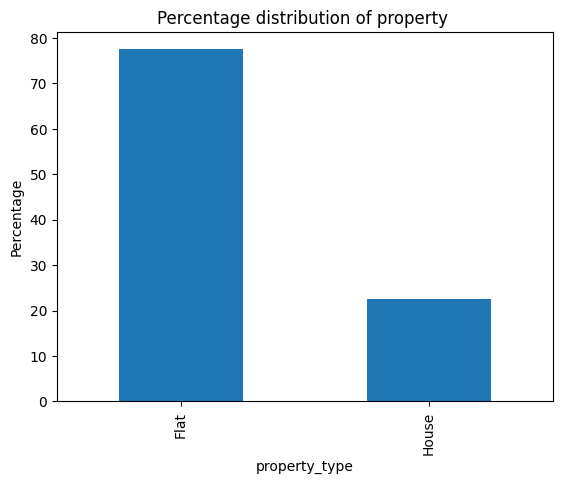

In [ ]:
(train_df['property_type'].value_counts(normalize=True)*100).plot(kind='bar')
plt.ylabel('Percentage')
plt.title(f'Percentage distribution of property ')
plt.show()

# observation>
    1. flats are almost(75) percent were as the homes data is only (~23) percent
    2.no null values 

# society ->


In [ ]:
train_df['society'].fillna('independent',inplace=True)

In [ ]:
train_df['society'].nunique()

675

In [ ]:
train_df.society.value_counts()

society
independent                                          487
tulip violet                                          75
ss the leaf                                           74
shapoorji pallonji joyville gurugram                  45
dlf new town heights                                  42
signature global park                                 37
shree vardhman victoria                               35
smart world orchard                                   33
smart world gems                                      33
emaar mgf emerald floors premier                      32
dlf the ultima                                        31
paras dews                                            31
m3m woodshire                                         30
dlf regal gardens                                     30
shree vardhman flora                                  29
la vida by tata housing                               28
signature global solera                               27
godrej nature plus     

In [ ]:
train_df.society.isnull().sum()

np.int64(0)

In [ ]:
train_df[train_df['society']!='independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.022618
ss the leaf                             0.044934
shapoorji pallonji joyville gurugram    0.058504
dlf new town heights                    0.071170
signature global park                   0.082328
shree vardhman victoria                 0.092883
smart world gems                        0.102835
smart world orchard                     0.112786
emaar mgf emerald floors premier        0.122437
dlf the ultima                          0.131785
paras dews                              0.141134
dlf regal gardens                       0.150181
m3m woodshire                           0.159228
shree vardhman flora                    0.167973
la vida by tata housing                 0.176417
signature global solera                 0.184560
godrej nature plus                      0.192702
emaar gurgaon greens                    0.200241
bptp terra                              0.207780
tata primanti                           0.215018
experion the

In [ ]:
society_counts = train_df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': np.int64(1),
 'High (50-100)': np.int64(2),
 'Average (10-49)': np.int64(97),
 'Low (2-9)': np.int64(285),
 'Very Low (1)': np.int64(290)}

<Axes: xlabel='society'>

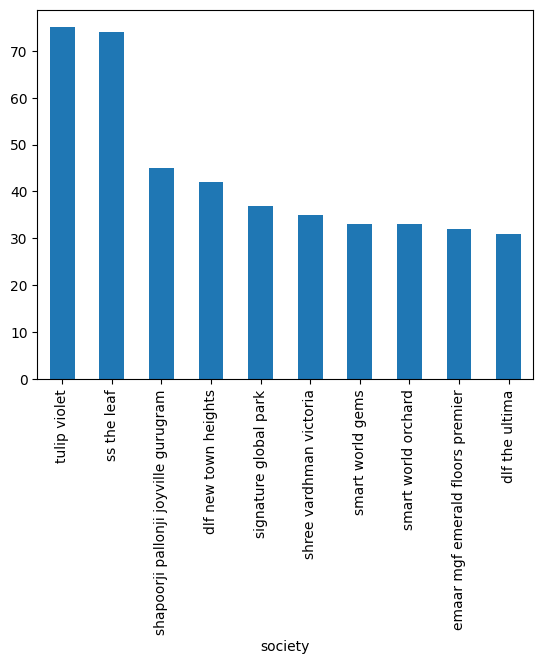

In [ ]:
(train_df[train_df['society']!='independent']['society'].value_counts().head(10).plot(kind='bar'))

> # observation :
   1. there is almost(~13 ) of the data with independent society 
   2. there is 675 diifrent types of society avalable 
   3. the top 75 society covers the 50 % of the data while rest 50 with 600
   4. 'Very High (>100)': np.int64(1),
 <!--  -->
         'High (50-100)': np.int64(2),
<!--  -->
         'Average (10-49)': np.int64(97),
<!--  -->
         'Low (2-9)': np.int64(285),
<!--  -->
         'Very Low (1)': np.int64(290)

# sector 

In [ ]:
train_df['sector'].isnull().sum()

np.int64(0)

In [ ]:
train_df['sector'].value_counts()

sector
sohna road                    163
sector 102                    112
sector 85                     110
sector 92                     104
sector 69                      94
sector 90                      91
sector 81                      90
sector 65                      90
sector 109                     88
sector 79                      80
sector 33                      74
sector 104                     73
sector 83                      69
sector 86                      67
sector 37d                     67
sector 43                      67
sector 95                      66
sector 89                      64
sector 50                      64
sector 2                       63
sector 107                     60
sector 108                     59
sector 56                      57
sector 48                      55
sector 70a                     54
sector 37c                     53
sector 70                      52
sector 84                      51
sector 26                      49
sector 

In [ ]:
train_df['sector'].nunique()

115

In [ ]:
train_df['sector'].value_counts(normalize=True).cumsum().head(24)

sector
sohna road    0.042861
sector 102    0.072311
sector 85     0.101236
sector 92     0.128583
sector 69     0.153300
sector 90     0.177229
sector 81     0.200894
sector 65     0.224560
sector 109    0.247699
sector 79     0.268735
sector 33     0.288194
sector 104    0.307389
sector 83     0.325532
sector 86     0.343150
sector 37d    0.360768
sector 43     0.378385
sector 95     0.395740
sector 89     0.412569
sector 50     0.429398
sector 2      0.445964
sector 107    0.461741
sector 108    0.477255
sector 56     0.492243
sector 48     0.506705
Name: proportion, dtype: float64

<Axes: xlabel='sector'>

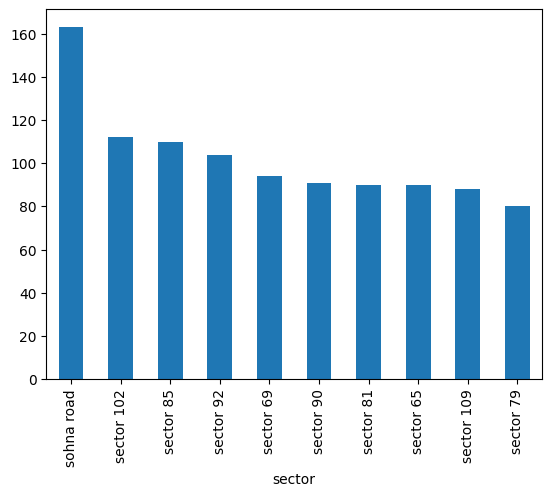

In [ ]:
(train_df['sector'].value_counts().head(10)).plot(kind='bar')

In [ ]:
sector_counts = train_df['sector'].value_counts()
#   frequency dstribution : for sector 
sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': np.int64(4),
 'High (50-100)': np.int64(24),
 'Average (10-49)': np.int64(63),
 'Low (2-9)': np.int64(23),
 'Very Low (1)': np.int64(1)}

 ># observation :
 1. there is no null value in the data 
 2. there are 115 nuique value for the sector column
 3. first 24 sector covers the 50 percent of the data and the rest is covered by the 91 sectors 
 4. {'Very High (>100)': np.int64(4),
 <!--  -->
 >'High (50-100)': np.int64(24),
 <!--  -->
 >'Average (10-49)': np.int64(63),
 <!--  -->
 >Low (2-9)': np.int64(23),
 <!--  -->
> 'Very Low (1)': np.int64(1)}

In [ ]:
train_df.sample()

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
984,Flat,rof ananda,sector 95,0.38,5899.0,644.0,Carpet area: 644.12 (59.84 sq.m.),2.0,2.0,2,5,NaN,Relatively New,NaN,NaN,644.111776,0,0,0,0,1,0,83


# price

In [ ]:
train_df['price'].isnull().sum()

np.int64(18)

In [ ]:
train_df['price'].describe()
# in crores 

count    3785.000000
mean        2.505804
std         2.950121
min         0.070000
25%         0.940000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

In [ ]:
train_df['price'].plot(kind='bar')